In [58]:
from sympy import *
from sympy.plotting import plot
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

init_printing(use_unicode=False, wrap_line=False, no_global=True)

## Частные производные

Найдите частные производные данных функций. Постройте графики этих производных, а также найдите их нули <br>
$ f(x,y)=x(y-5)^2 $ <br>
$ f(x,y)=(y-\frac{e}{20})^2sin(\pi x) $ <br>
$ f(x,y)=xsin(x)sin(y-2) $ <br>

In [26]:
x, y = symbols('x, y')

In [55]:
def print_params(f, var):
    print(f'Производная по {var}:')
    f_diff = diff(f, var)
    print(f_diff)
    plot3d(f_diff)
    print(f'Нули производной по {var}:')
    print(solve(f_diff))

In [56]:
f1 = x*(y - 5)**2
f1

Производная по x:
(y - 5)**2


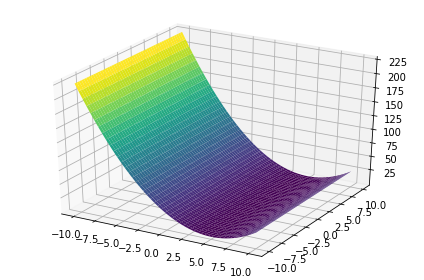

Нули производной по x:
[5]


In [59]:
print_params(f1, x)

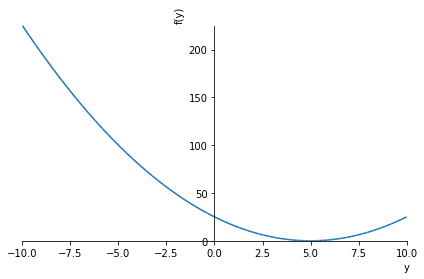

In [60]:
plot(diff(f1, x))

Производная по y:
x*(2*y - 10)


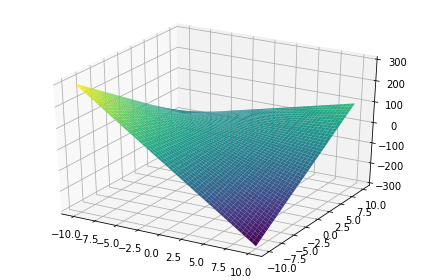

Нули производной по y:
[{x: 0}, {y: 5}]


In [61]:
print_params(f1, y)

In [37]:
f2 = (y - E/20)**2 * sin(pi*x)
f2

Производная по x:
pi*(y - E/20)**2*cos(pi*x)


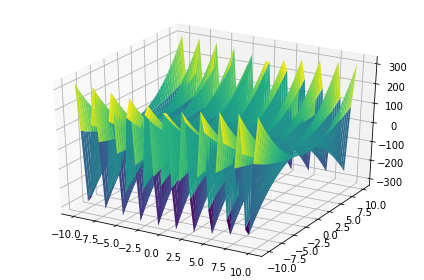

Нули производной по x:
[{x: 1/2}, {x: 3/2}, {y: E/20}]


In [62]:
print_params(f2, x)

Производная по y:
(2*y - E/10)*sin(pi*x)


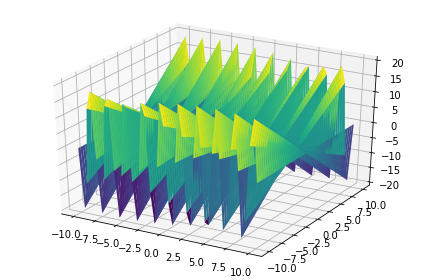

Нули производной по y:
[{x: 0}, {x: 1}, {y: E/20}]


In [63]:
print_params(f2, y)

In [38]:
f3 = x * sin(x) * sin(y - 2)
f3

Производная по x:
x*sin(y - 2)*cos(x) + sin(x)*sin(y - 2)


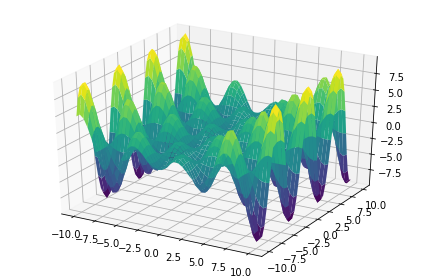

Нули производной по x:
[{y: 2}, {y: 2 + pi}]


In [64]:
print_params(f3, x)

Производная по y:
x*sin(x)*cos(y - 2)


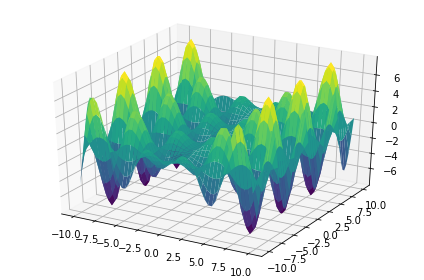

Нули производной по y:
[{x: 0}, {x: pi}, {y: 2 + 3*pi/2}, {y: pi/2 + 2}]


In [65]:
print_params(f3, y)

## Решение задачи

Найдите наилучшую, с точки зрения среднеквадратичной ошибки, функцию, приближающую зависимость времени разгона автомобиля до 100 км/ч от его массы и мощности двигателя. 
Данные для аппроксимации в таблице ниже:
* масса    | мощность двигателя | время разгона
* 1945 кг. | 560 лс.            | 4.3 с.
* 1495 кг. | 340 лс.            | 4.9 с.
* 1570 кг. | 343 лс.            | 5.2 с.
* 1520 кг. | 431 лс.            | ? с.

Выпишите MSE, найдите его частные производные, затем с помощью sympy найдите точку минимума и предскажите времени разгона до 100 км/ч автомобиля массой 1520 кг и с максимальной мощностью двигателя равной 431 лс.


In [7]:
x1, x2, y = symbols('x1, x2, y')
a0, a1, a2 = symbols('a0, a1, a2')

In [12]:
f = a2*x2 + a1*x1 + a0
f_eq = f - y
list_xy = [x2, x1, y]

In [13]:
list_values = [
    [1945, 560, 4.3],
    [1495, 340, 4.9],
    [1570, 343, 5.2],
]

In [19]:
MSE = 1/3 * (f_eq.subs(dict(zip(list_xy, list_values[0])))**2 + \
             f_eq.subs(dict(zip(list_xy, list_values[1])))**2 + \
             f_eq.subs(dict(zip(list_xy, list_values[2])))**2)
MSE

In [21]:
list_k = [a2, a1, a0]
#eqns = [diff(MSE, a2), diff(MSE, a1), diff(MSE, a0)]
eqns = []
for item in list_k:
    eqns.append(diff(MSE, item))
eqns

In [22]:
A = linear_eq_to_matrix(eqns, list_k)
list_solve = linsolve(A, list_k)
list_solve

In [23]:
MSE.subs(dict(zip(list_k, list_solve.args[0])))

In [24]:
f_res = f.subs(dict(zip(list_k, list_solve.args[0])))
f_res

In [25]:
f_res.subs({x2: 1520, x1: 431})